In [1]:
import sys
sys.path.append("../")
import models
from utils import *

BURNIN = 300000
THIN = 100

%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


/Users/asifzubair/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def open_run_subsample(file_name, burn_in = 5000, thin = 10):
    df = pd.read_table(file_name)
    return sub_sample(df, burn_in, thin)

In [3]:
df_a6 = open_run_subsample("../data/posteriors/m_a6/posteriors_pt_1M_10.csv", burn_in= BURNIN, thin = THIN)
df_b7 = open_run_subsample("../data/posteriors/m_b7/posteriors_pt_1M_10.csv", burn_in= BURNIN, thin = THIN)
df_b7r = open_run_subsample("../data/posteriors/m_b7r/posteriors_pt_1M_10.csv", burn_in= BURNIN, thin = THIN)
df_c8 = open_run_subsample("../data/posteriors/m_c8/posteriors_pt_1M_10.csv", burn_in= BURNIN, thin = THIN)

In [4]:
ma6 = models.PapaModelA6()
mb7 = models.PapaModelB7()
mb7r = models.PapaModelB7r()
mc8 = models.PapaModelC8()

In [5]:
def plot_post(df, predict, axes, i, sample_every=10):
    ax = axes.flatten()
    post = sub_sample(df, 0, sample_every)
    for parms in post.iterrows():
        Ji = predict(parms[1][:-2])
        for ii in range(i, i+4):
            ax[ii].plot(Ji[ii%4*100:100+ii%4*100],'b-')           

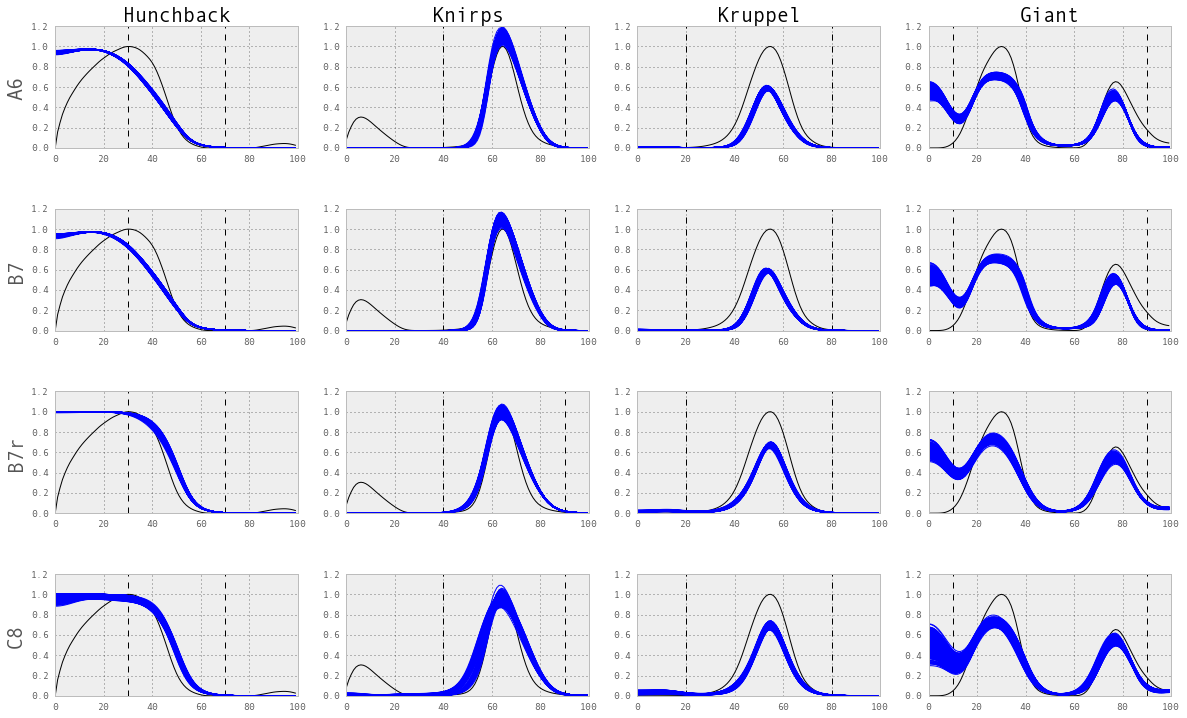

In [10]:
gap = ["Hunchback","Knirps","Kruppel","Giant"]
dom_antr = [30, 40, 20, 10]
dom_post = [70, 90, 80, 90]
fig, ax = plt.subplots(4,4)
fig.set_size_inches(20, 12)
models = ["A6", "B7", "B7r", "C8"]
y = ma6.y
for i, a in enumerate(ax.flatten()):
    a.plot(y[i%4*100:100+i%4*100],"black")
    a.set_ylim(0,1.2)
    a.plot((dom_antr[i%4], dom_antr[i%4]), (0,1.2), 'k--')
    a.plot((dom_post[i%4], dom_post[i%4]), (0,1.2), 'k--')
    if i % 4 == 0 :
        a.set_ylabel(models[i/4], fontsize = 20)
    if i < 4:
        a.set_title(gap[i], fontsize = 20) 
plot_post(df_a6, ma6.predict, ax, 0)
plot_post(df_b7, mb7.predict, ax, 4)
plot_post(df_b7r, mb7r.predict, ax, 8)
plot_post(df_c8, mc8.predict, ax, 12)

In [7]:
import matplotlib
matplotlib.matplotlib_fname()

u'/Users/asifzubair/.matplotlib/matplotlibrc'